In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
from scipy import stats

In [2]:
transactions = pd.read_csv("./data/dh_transactions.csv")

In [3]:
baskets = transactions.groupby(['basket'])

In [10]:
sale_per_baskets = baskets['dollar_sales'].sum()
weeks = (baskets['week'].sum()/baskets.size())

# Compare Year 1 with Year 2 Sales

During EDA, I found that year 1 and year 2 sales data is very similar to each others. I will explore that statement further below.

In [11]:
sale_each_weeks = np.zeros(105)
for idx,val in sale_per_baskets.items():
    sale_each_weeks[int(weeks[idx])] += val

In [77]:
year_1_sales_by_weeks = sale_each_weeks[1:53]
year_2_sales_by_weeks = sale_each_weeks[53:]

Text(0, 0.5, 'week')

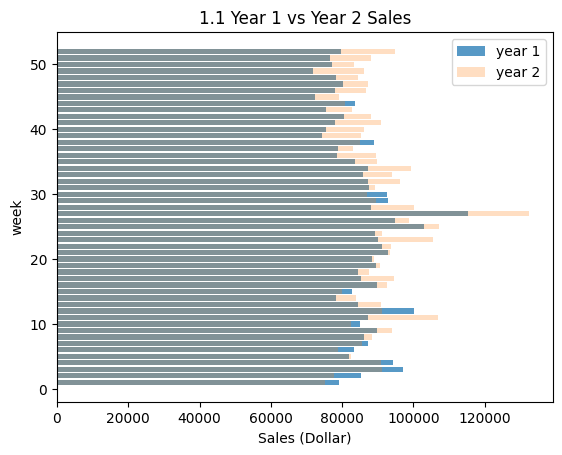

In [159]:
plt.barh(np.arange(1,53,1),year_1_sales_by_weeks,alpha = 0.75, label = "year 1")
plt.barh(np.arange(1,53,1),year_2_sales_by_weeks, alpha = 0.25, label = "year 2")
plt.legend()
plt.title("1.1 Year 1 vs Year 2 Sales")
plt.xlabel("Sales (Dollar)")
plt.ylabel("week")

In [79]:
sale_diff_between_year = (year_2_sales_by_weeks - year_1_sales_by_weeks)/year_1_sales_by_weeks

Text(0, 0.5, 'Frequency')

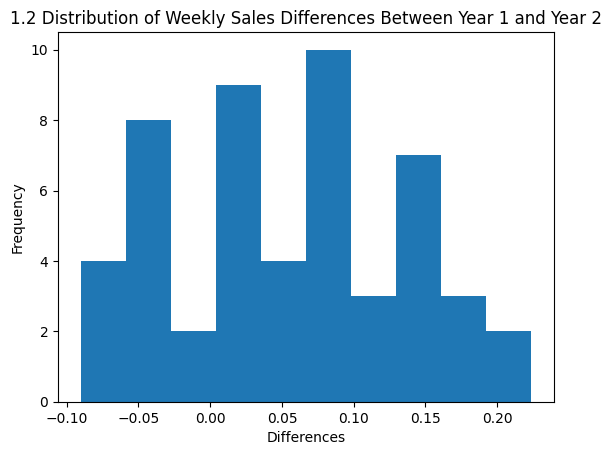

In [160]:
plt.hist(sale_diff_between_year)
plt.title("1.2 Distribution of Weekly Sales Differences Between Year 1 and Year 2")
plt.xlabel("Differences")
plt.ylabel("Frequency")

In [81]:
(np.sum(year_2_sales_by_weeks) - np.sum(year_1_sales_by_weeks))/np.sum(year_1_sales_by_weeks)

0.05244439077307789

PearsonRResult(statistic=0.695771138352794, pvalue=1.0315916801394647e-08)


Text(0.5, 1.0, '1.3 Correlation Plot Between Year 1 and Year 2 (Sales)')

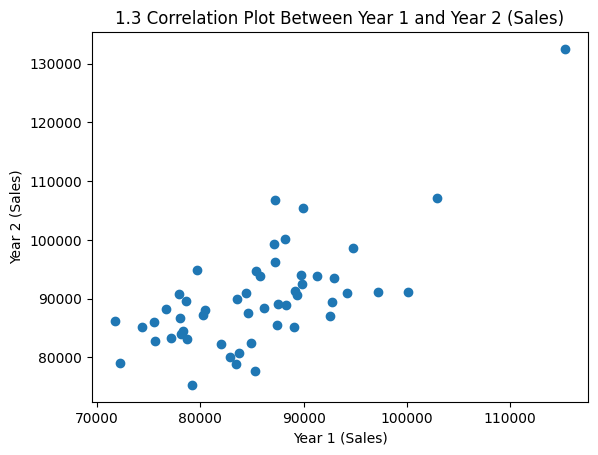

In [161]:
print(stats.pearsonr(year_1_sales_by_weeks,year_2_sales_by_weeks))
plt.scatter(year_1_sales_by_weeks,year_2_sales_by_weeks)
plt.xlabel("Year 1 (Sales)")
plt.ylabel("Year 2 (Sales)")
plt.title("1.3 Correlation Plot Between Year 1 and Year 2 (Sales)")

In [31]:
basket_per_weeks = weeks.value_counts().sort_index()

In [43]:
year_1_basket_per_weeks = basket_per_weeks[:52].to_numpy()
year_2_basket_per_weeks = basket_per_weeks[53:].to_numpy()

Text(0, 0.5, 'week')

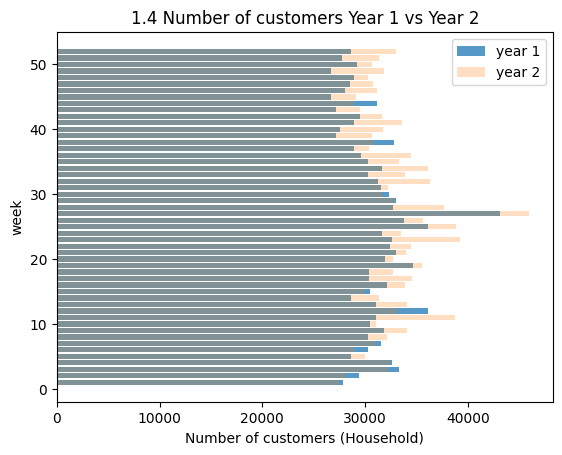

In [162]:
plt.barh(np.arange(1,53,1),year_1_basket_per_weeks,alpha = 0.75, label = "year 1")
plt.barh(np.arange(1,53,1),year_2_basket_per_weeks, alpha = 0.25, label = "year 2")
plt.legend()
plt.title("1.4 Number of customers Year 1 vs Year 2")
plt.xlabel("Number of customers (Household)")
plt.ylabel("week")

In [44]:
(np.sum(year_2_basket_per_weeks) - np.sum(year_1_basket_per_weeks))/np.sum(year_1_basket_per_weeks)

0.06455410386552676

PearsonRResult(statistic=0.7274276141327971, pvalue=1.0078307651616164e-09)


Text(0.5, 1.0, '1.5 Correlation Plot Between Year 1 and Year 2 (Number of Customers)')

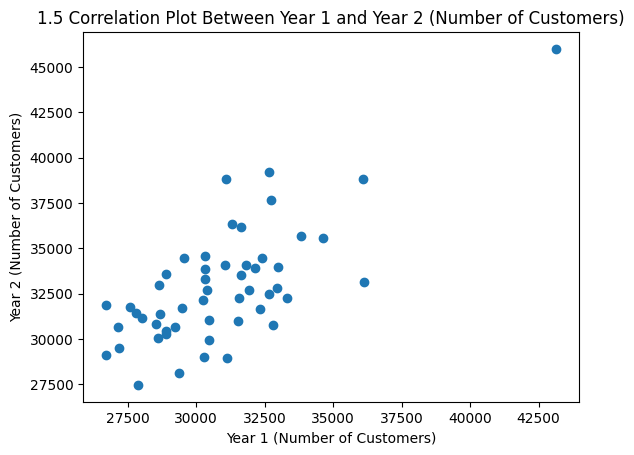

In [163]:
print(stats.pearsonr(year_1_basket_per_weeks,year_2_basket_per_weeks))
plt.scatter(year_1_basket_per_weeks,year_2_basket_per_weeks)
plt.xlabel("Year 1 (Number of Customers)")
plt.ylabel("Year 2 (Number of Customers)")
plt.title("1.5 Correlation Plot Between Year 1 and Year 2 (Number of Customers)")

### Conclusion

1. sales and number of customers increase by 5.24 and 6.46 percents respectively from year 1 to year 2.
2. On weekly basis, sales and number of customers data between year 1 and year 2 are highly correlated which will help prediction which week will have low/high sales/customers in the future.

# Time Related Factors

In [46]:
times = (baskets['time_of_transaction'].sum()/baskets.size()).to_numpy()

In [47]:
bins = np.arange(0,2401,100)

Text(0, 0.5, 'Frequency')

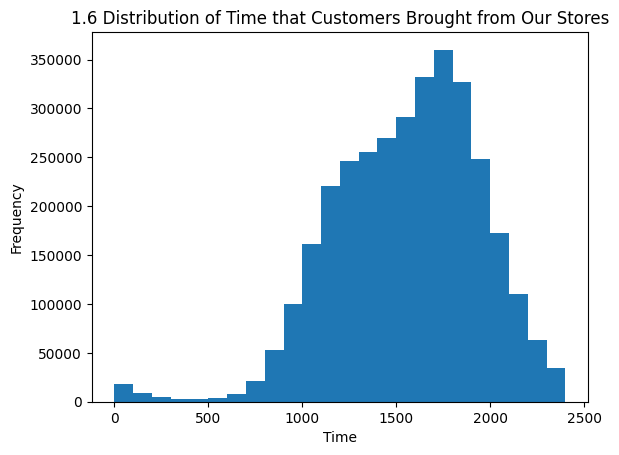

In [164]:
plt.hist(times, bins = bins)
plt.title("1.6 Distribution of Time that Customers Brought from Our Stores")
plt.xlabel("Time")
plt.ylabel("Frequency")

In [49]:
transactions["day_of_week"] = transactions["day"]%7

In [53]:
sale_by_day_of_weeks = transactions.groupby(['day_of_week'])

In [54]:
sale_per_day_of_weeks = sale_by_day_of_weeks["dollar_sales"].sum()

Text(0.5, 0, 'Total Sales (Dollar)')

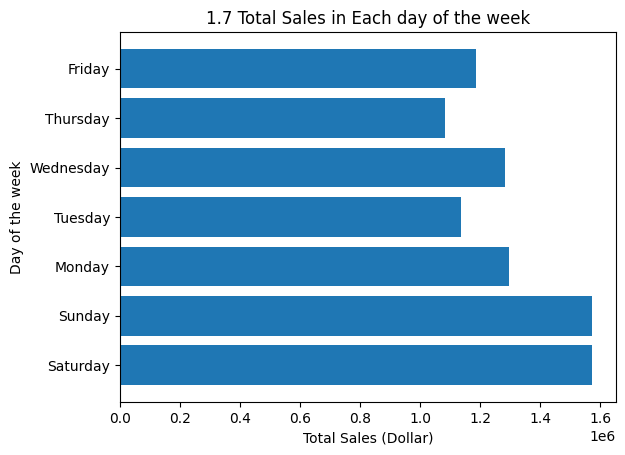

In [171]:
plt.barh(["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],sale_per_day_of_weeks)
plt.title("1.7 Total Sales in Each day of the week")
plt.ylabel("Day of the week")
plt.xlabel("Total Sales (Dollar)")

In [60]:
baskets = transactions.groupby(['basket'])
day_of_week_for_baskets = (baskets['day_of_week'].sum()/baskets.size())

In [68]:
baskets_in_day_of_week = day_of_week_for_baskets.value_counts()

Text(0.5, 0, 'Total Customers (Household)')

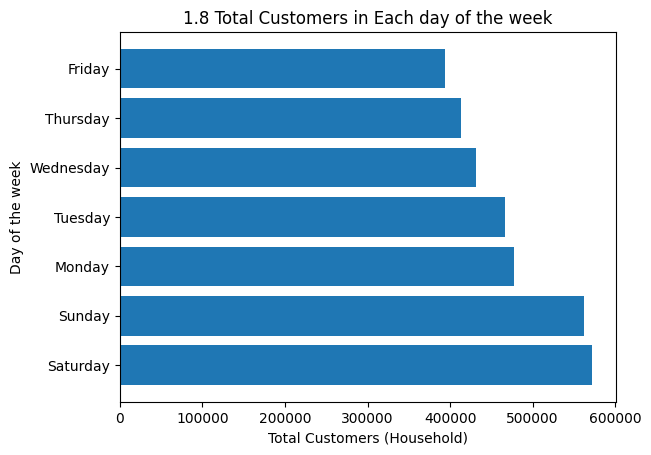

In [172]:
plt.barh(["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],baskets_in_day_of_week)
plt.title("1.8 Total Customers in Each day of the week")
plt.ylabel("Day of the week")
plt.xlabel("Total Customers (Household)")

## Conclusion
Assume the record start from sunday for simplicity (day 1 is sunday 2 is monday and so on)
1. Our store will be significantly more active in saturday and sunday compare to other days of the week (both in sales and number of customers).
2. Our store peak time is between 17.00-19.00.

# Geographical Related Factors

In [117]:
s = time.time()
geographical_data = {"year 1":{1:(0,0),2:(0,0)},"year 2":{1:(0,0),2:(0,0)}}
for basket_id in range(1,3316349+1):
    basket_data = baskets.get_group(basket_id)
    geo_location = baskets.get_group(basket_id)["geography"].values[0]
    if baskets.get_group(basket_id)["week"].values[0] <= 52:
        tmp_a, tmp_b = geographical_data["year 1"][geo_location]
        tmp_a += 1
        tmp_b += basket_data["dollar_sales"].sum()
        geographical_data["year 1"][geo_location] = (tmp_a, tmp_b)
    else:
        tmp_a, tmp_b = geographical_data["year 2"][geo_location]
        tmp_a += 1
        tmp_b += basket_data["dollar_sales"].sum()
        geographical_data["year 2"][geo_location] = (tmp_a, tmp_b)
    if basket_id%200000 == 0:
        e = time.time()
        print(f"basket : {basket_id}, time: {e-s}")

basket : 200000, time: 66.37654280662537
basket : 400000, time: 126.95987391471863
basket : 600000, time: 193.80064487457275
basket : 800000, time: 405.86175775527954
basket : 1000000, time: 467.15329790115356
basket : 1200000, time: 564.7461638450623
basket : 1400000, time: 1101.712033033371
basket : 1600000, time: 1167.2763357162476
basket : 1800000, time: 1236.4014308452606
basket : 2000000, time: 1309.3180139064789
basket : 2200000, time: 1380.985838651657
basket : 2400000, time: 1444.3428297042847
basket : 2600000, time: 2432.114094734192
basket : 2800000, time: 2501.9027750492096
basket : 3000000, time: 2570.1323437690735
basket : 3200000, time: 2632.2740516662598


In [118]:
geographical_data

{'year 1': {1: (864388, 2396537.539996838), 2: (741939, 2052264.6399982811)},
 'year 2': {1: (912367, 2522241.480001837), 2: (797655, 2159875.420000176)}}

Text(0.5, 1.0, 'Location 2 year 1 vs 2')

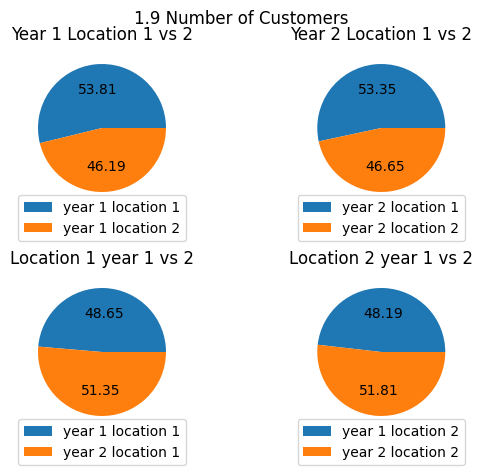

In [167]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.suptitle("1.9 Number of Customers")

plt.subplot(2, 2, 1)
plt.pie([geographical_data["year 1"][1][0],geographical_data["year 1"][2][0]],
        labels = ["year 1 location 1", "year 1 location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Year 1 Location 1 vs 2")

plt.subplot(2, 2, 2)
plt.pie([geographical_data["year 2"][1][0],geographical_data["year 2"][2][0]],
        labels = ["year 2 location 1", "year 2 location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Year 2 Location 1 vs 2")

plt.subplot(2, 2, 3)
plt.pie([geographical_data["year 1"][1][0],geographical_data["year 2"][1][0]],
        labels = ["year 1 location 1", "year 2 location 1"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Location 1 year 1 vs 2")

plt.subplot(2, 2, 4)
plt.pie([geographical_data["year 1"][2][0],geographical_data["year 2"][2][0]],
        labels = ["year 1 location 2", "year 2 location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Location 2 year 1 vs 2")

Text(0.5, 1.0, 'Location 2 year 1 vs 2')

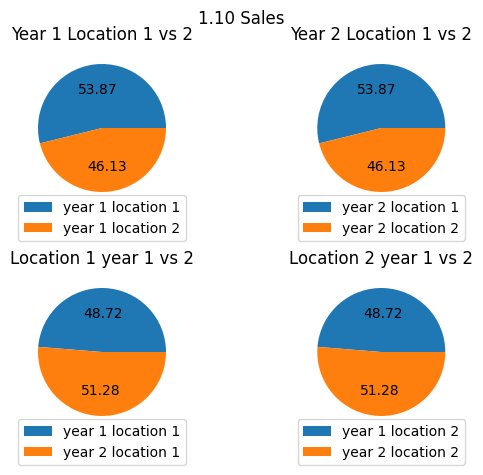

In [168]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.suptitle("1.10 Sales")

plt.subplot(2, 2, 1)
plt.pie([geographical_data["year 1"][1][1],geographical_data["year 1"][2][1]],
        labels = ["year 1 location 1", "year 1 location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Year 1 Location 1 vs 2")

plt.subplot(2, 2, 2)
plt.pie([geographical_data["year 2"][1][1],geographical_data["year 2"][2][1]],
        labels = ["year 2 location 1", "year 2 location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Year 2 Location 1 vs 2")

plt.subplot(2, 2, 3)
plt.pie([geographical_data["year 1"][1][1],geographical_data["year 2"][1][1]],
        labels = ["year 1 location 1", "year 2 location 1"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Location 1 year 1 vs 2")

plt.subplot(2, 2, 4)
plt.pie([geographical_data["year 1"][2][1],geographical_data["year 2"][2][1]],
        labels = ["year 1 location 2", "year 2 location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("Location 2 year 1 vs 2")

Text(0.5, 1.0, '1.11 Number of Customers Location 1 vs 2')

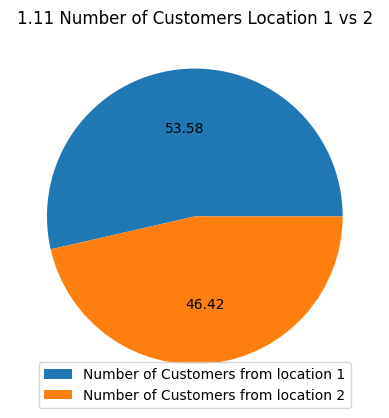

In [169]:
plt.pie([geographical_data["year 1"][1][0]+geographical_data["year 2"][1][0],
        geographical_data["year 1"][2][0]+geographical_data["year 2"][2][0]],
        labels = ["Number of Customers from location 1", "Number of Customers from location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("1.11 Number of Customers Location 1 vs 2")

Text(0.5, 1.0, '1.12 Total Sales Location 1 vs 2')

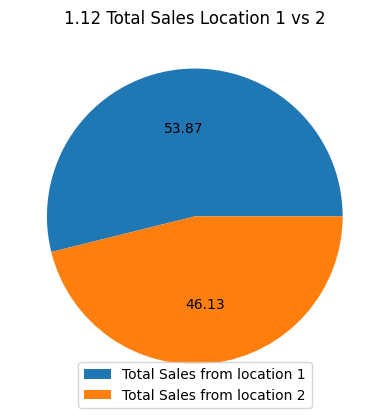

In [185]:
plt.pie([geographical_data["year 1"][1][1]+geographical_data["year 2"][1][1],
        geographical_data["year 1"][2][1]+geographical_data["year 2"][2][1]],
        labels = ["Total Sales from location 1", "Total Sales from location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("1.12 Total Sales Location 1 vs 2")

In [174]:
loc_1_stores = transactions[transactions["geography"] == 1]["store"].unique()
loc_2_stores = transactions[transactions["geography"] == 2]["store"].unique()

Text(0.5, 1.0, '1.13 Number of Store in Location 1 vs 2')

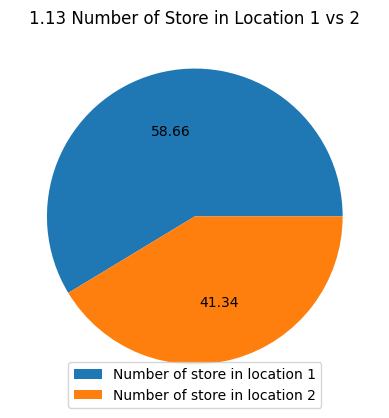

In [187]:

plt.pie([len(loc_1_stores),
        len(loc_2_stores)],
        labels = ["Number of store in location 1", "Number of store in location 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.125),
          fancybox=True, ncol=1)
plt.title("1.13 Number of Store in Location 1 vs 2")

In [177]:
avg_sale_per_store_loc_1 = (geographical_data["year 1"][1][1]+geographical_data["year 2"][1][1])/len(loc_1_stores)
avg_sale_per_store_loc_2 = (geographical_data["year 1"][2][1]+geographical_data["year 2"][2][1])/len(loc_2_stores)
print(avg_sale_per_store_loc_1,avg_sale_per_store_loc_2)
print((avg_sale_per_store_loc_2-avg_sale_per_store_loc_1)/avg_sale_per_store_loc_1)

21668.630044047026 26325.87537499036
0.2149303080756048


In [188]:
avg_customer_per_store_loc_1 = (geographical_data["year 1"][1][0]+geographical_data["year 2"][1][0])/len(loc_1_stores)
avg_customer_per_store_loc_2 = (geographical_data["year 1"][2][0]+geographical_data["year 2"][2][0])/len(loc_2_stores)
print(avg_customer_per_store_loc_1,avg_customer_per_store_loc_2)
print((avg_customer_per_store_loc_2-avg_customer_per_store_loc_1)/avg_customer_per_store_loc_1)

7827.114537444934 9622.4625
0.22937545553551267


## Conclusion

For simplicity, I will use the word location instead of geography to make it a bit easier to understand.
1. Our store in location 1 is performing better than store in location 2 in both aspects (sales and number of customers) by approximately 16%. 
2. Even though the margin between store in each location is looking high, the overall distribution is relatively balanced in both aspects with ~54% coming from location 1 and ~46% coming from location 2.
3. However, if we focus on performance of each store individually, stores in location 2 are performing 21.49% better than stores in location 1 on average. (Number of customers also gets 22.93% higher)